<a href="https://colab.research.google.com/github/DirkFritz/finance_data_analysis/blob/main/index_analysis/ndx100_marketcap_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [10]:
nasdaq_df = pd.read_csv('/content/drive/MyDrive/Entwicklung/IndexAnalyzer/nasdaq_screener_1620482682649.csv')
nasdaq_df = nasdaq_df.set_index('Symbol')
nasdaq_df

,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
Symbol,,,,,,,,,,
AACG,ATA Creativity Global American Depositary Shares,$2.91,0.050,1.748%,9.225046e+07,China,NaN,29521,Miscellaneous,Service to the Health Industry
AACQ,Artius Acquisition Inc. Class A Common Stock,$9.91,-0.010,-0.101%,8.974744e+08,United States,2020.0,836193,Finance,Business Services
AACQU,Artius Acquisition Inc. Unit,$10.53,0.030,0.286%,0.000000e+00,United States,2020.0,5682,Finance,Business Services
AACQW,Artius Acquisition Inc Warrant,$1.74,-0.010,-0.571%,0.000000e+00,United States,2020.0,108862,Finance,Business Services
AAL,American Airlines Group Inc. Common Stock,$22.00,0.510,2.373%,1.411043e+10,United States,NaN,31973741,Transportation,Air Freight/Delivery Services
...,...,...,...,...,...,...,...,...,...,...
ZWRKU,Z-Work Acquisition Corp. Units,$10.00,0.020,0.20%,0.000000e+00,United States,2021.0,733,NaN,NaN
ZWRKW,Z-Work Acquisition Corp. Warrant,$0.685,-0.015,-2.143%,0.000000e+00,United States,2021.0,86860,Finance,Business Services
ZY,Zymergen Inc. Common Stock,$42.77,1.530,3.71%,4.188932e+09,United States,2021.0,144513,Basic Industries,Industrial Specialties


In [11]:
nasdaq100_df = pd.read_html('https://en.wikipedia.org/wiki/Nasdaq-100')[3]
nasdaq100_df

,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Activision Blizzard,ATVI,Communication Services,Interactive Home Entertainment
1,Adobe Inc.,ADBE,Information Technology,Application Software
2,Advanced Micro Devices,AMD,Information Technology,Semiconductors
3,Alexion Pharmaceuticals,ALXN,Health Care,Pharmaceuticals
4,Align Technology,ALGN,Health Care,Health Care Supplies
...,...,...,...,...
97,"Walgreen Boots Alliance, Inc.",WBA,Consumer Staples,Drug Retail
98,"Workday, Inc.",WDAY,Information Technology,Application Software
99,Xcel Energy Inc.,XEL,Utilities,Multi-Utilities
100,"Xilinx, Inc.",XLNX,Information Technology,Semiconductors


In [ ]:
df=nasdaq_df.loc[nasdaq100_df['Ticker'],:]
df[df.columns[1]] = df[df.columns[1]].replace('[\$,]', '', regex=True).astype(float)
df['No Shares'] = df['Market Cap']/df['Last Sale']

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  display(df)

In [13]:
ndx_sectors = df['Sector'].unique()
print(ndx_sectors)

['Technology' 'Health Care' 'Consumer Services' 'Public Utilities'
 'Capital Goods' 'Miscellaneous' 'Transportation' nan
 'Consumer Non-Durables']


In [14]:
df.to_csv('/content/drive/MyDrive/Entwicklung/IndexAnalyzer/nasdaq100.csv')

In [15]:
ndx_prices_df = pd.read_csv('/content/drive/MyDrive/Entwicklung/IndexAnalyzer/ndxdata.csv')
ndx_prices_df

,Unnamed: 0,Symbol,DateTime,Price
0,0,ATVI,20200508,73.72
1,1,ATVI,20200511,75.90
2,2,ATVI,20200512,72.24
3,3,ATVI,20200513,74.00
4,4,ATVI,20200514,73.45
...,...,...,...,...
25693,247,ZM,20210503,313.00
25694,248,ZM,20210504,305.00
25695,249,ZM,20210505,302.20
25696,250,ZM,20210506,293.80


In [16]:
nasdaq_df = nasdaq_df.reset_index()

nasdaq_df





,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,AACG,ATA Creativity Global American Depositary Shares,$2.91,0.050,1.748%,9.225046e+07,China,NaN,29521,Miscellaneous,Service to the Health Industry
1,AACQ,Artius Acquisition Inc. Class A Common Stock,$9.91,-0.010,-0.101%,8.974744e+08,United States,2020.0,836193,Finance,Business Services
2,AACQU,Artius Acquisition Inc. Unit,$10.53,0.030,0.286%,0.000000e+00,United States,2020.0,5682,Finance,Business Services
3,AACQW,Artius Acquisition Inc Warrant,$1.74,-0.010,-0.571%,0.000000e+00,United States,2020.0,108862,Finance,Business Services
4,AAL,American Airlines Group Inc. Common Stock,$22.00,0.510,2.373%,1.411043e+10,United States,NaN,31973741,Transportation,Air Freight/Delivery Services
...,...,...,...,...,...,...,...,...,...,...,...
4176,ZWRKU,Z-Work Acquisition Corp. Units,$10.00,0.020,0.20%,0.000000e+00,United States,2021.0,733,NaN,NaN
4177,ZWRKW,Z-Work Acquisition Corp. Warrant,$0.685,-0.015,-2.143%,0.000000e+00,United States,2021.0,86860,Finance,Business Services
4178,ZY,Zymergen Inc. Common Stock,$42.77,1.530,3.71%,4.188932e+09,United States,2021.0,144513,Basic Industries,Industrial Specialties
4179,ZYNE,Zynerba Pharmaceuticals Inc. Common Stock,$4.49,0.480,11.97%,1.852194e+08,United States,2015.0,2578443,Health Care,Major Pharmaceuticals


In [20]:
fangplus_symbols =['AMZN','FB','AAPL','GOOG','GOOGL','MSFT']

ndx100 = nasdaq_df.loc[nasdaq_df['Symbol'].isin(nasdaq100_df['Ticker'].tolist()) ]
ndx100_no_faang = ndx100.loc[~ndx100['Symbol'].isin(fangplus_symbols) ]
ndx100_no_faang_tech = ndx100_no_faang.loc[ndx100_no_faang['Sector'] =='Technology']
ndx100_no_faang_no_tech = ndx100_no_faang.loc[ndx100_no_faang['Sector'] !='Technology']

ndx100_no_faang_no_tech

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
79,ADP,Automatic Data Processing Inc. Common Stock,$194.89,-0.430,-0.22%,8.292927e+10,United States,NaN,1968294,Miscellaneous,Business Services
99,AEP,American Electric Power Company Inc. Common Stock,$87.19,-0.190,-0.217%,4.357324e+10,United States,NaN,2617043,Public Utilities,Electric Utilities: Central
174,ALGN,Align Technology Inc. Common Stock,$598.34,13.620,2.329%,4.735058e+10,United States,2001.0,694666,Health Care,Industrial Specialties
202,ALXN,Alexion Pharmaceuticals Inc. Common Stock,$170.43,0.570,0.336%,3.766831e+10,United States,1996.0,1372397,Health Care,Biotechnology: Commercial Physical & Biologica...
209,AMAT,Applied Materials Inc. Common Stock,$132.95,1.220,0.926%,1.220030e+11,United States,1972.0,7523096,Capital Goods,Industrial Machinery/Components
215,AMGN,Amgen Inc. Common Stock,$254.21,2.910,1.158%,1.460574e+11,United States,1983.0,2512725,Health Care,Major Pharmaceuticals
500,BIIB,Biogen Inc. Common Stock,$274.04,1.930,0.709%,4.125802e+10,United States,NaN,936120,Health Care,Major Pharmaceuticals
514,BKNG,Booking Holdings Inc. Common Stock,$2327.08,47.730,2.094%,9.553318e+10,United States,NaN,381572,Transportation,Other Consumer Services
726,CERN,Cerner Corporation Common Stock,$76.68,1.510,2.009%,2.310499e+10,United States,1986.0,3866417,Health Care,Managed Health Care
790,CHTR,Charter Communications Inc. Class A Common Sto...,$693.44,17.650,2.612%,1.420853e+11,United States,NaN,718916,Consumer Services,Television Services


In [23]:
def creade_market_cap_record(market_cap_df,group_name, symbols_group,stock_prices_df ):
  compare_date1 = 20210216
  compare_date2 = 20210427
  print(symbols_group)

  for symbol in symbols_group:
    price_data1 = stock_prices_df.loc[(stock_prices_df['DateTime'] == compare_date1) & (stock_prices_df['Symbol'] == symbol)]['Price'].iloc[0]
    price_data2 = stock_prices_df.loc[(stock_prices_df['DateTime'] == compare_date2) & (stock_prices_df['Symbol'] == symbol)]['Price'].iloc[0]
    number_shares =df.loc[symbol]['No Shares']
    #print(price_data1,"", price_data2, '', number_shares)
 
    data_record =[ [group_name,symbol,compare_date1,number_shares*price_data1,compare_date2,number_shares*price_data2]]
    #print(data_record)
    market_cap_df = market_cap_df.append(pd.DataFrame(data_record, columns=market_cap_groups_cols))
    
  return market_cap_df
  


In [ ]:
market_cap_groups_cols = ['Group','Symbol', 'Date1', 'Market Cap 1', 'Date2','Market Cap 2']
market_cap_groups_df = pd.DataFrame(columns=market_cap_groups_cols)

market_cap_groups_df =creade_market_cap_record( market_cap_groups_df,"FAANG+", fangplus_symbols,ndx_prices_df)
market_cap_groups_df =creade_market_cap_record( market_cap_groups_df,"TECH", ndx100_no_faang_tech['Symbol'].tolist(),ndx_prices_df)
market_cap_groups_df =creade_market_cap_record( market_cap_groups_df,"OTHERS", ndx100_no_faang_no_tech['Symbol'].tolist(),ndx_prices_df)


market_cap_groups_df.loc[market_cap_groups_df['Symbol'].isin(['GOOG', 'GOOGL']),['Market Cap 1','Market Cap 2']] *=0.5
market_cap_groups_df['Percent1'] = (market_cap_groups_df['Market Cap 1'] / market_cap_groups_df['Market Cap 1'].sum()) * 100
market_cap_groups_df['Percent2'] = (market_cap_groups_df['Market Cap 2'] / market_cap_groups_df['Market Cap 2'].sum()) * 100
market_cap_grouped_df = market_cap_groups_df.groupby('Group').sum()

market_cap_grouped_df['Delta'] = market_cap_grouped_df['Percent2']-market_cap_grouped_df['Percent1']
market_cap_groups_df[market_cap_groups_df['Group'] == 'TECH']

,Market Cap 1,Market Cap 2,Percent1,Percent2,Delta
Group,,,,,
FAANG+,7.988089e+12,8.481669e+12,47.710504,49.778876,2.068372
OTHERS,5.314428e+12,5.151642e+12,31.741516,30.234963,-1.506553
TECH,3.440313e+12,3.405380e+12,20.547980,19.986161,-0.561819


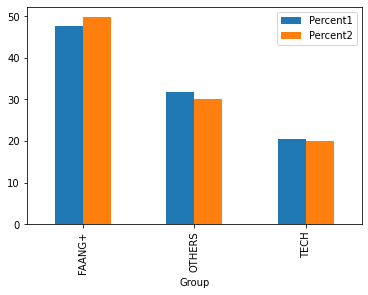

In [34]:
market_cap_grouped_df[['Percent1', 'Percent2']].plot(kind="bar")
market_cap_grouped_df

